In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import geoplot as gplt
import random
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import parry.binning_functions as pbf
from shapely.strtree import STRtree
import mapclassify as mc
import json

In [2]:
def gen_poly(x1, x2, x3, y1, y2, y3):
    poly1 = Polygon(((0, 0), (0, y1), (x1, y1), (x1, 0)))
    poly2 = Polygon(((0, y1+y2), (0, y1+y2+y3), (x1, y1+y2+y3), (x1, y1+y2)))
    poly3 = Polygon(((x1+x2, 0), (x1+x2, y1), (x1+x2+x3, y1), (x1+x2+x3, 0)))
    poly4 = Polygon(((x1+x2, y1+y2), (x1+x2, y1+y2+y3), (x1+x2+x3, y1+y2+y3), (x1+x2+x3, y1+y2)))
    polys = [poly1, poly2, poly3, poly4]
    return gp.GeoDataFrame(geometry=polys)

def gen_triangle(x1, x2, x3, y1, y2, y3):
    poly1 = Polygon(((0, 0), (0, y1), (x1, y1)))
    #poly2 = Polygon(((0, y1+y2), (0, y1+y2+y3), (x1, y1+y2+y3), (x1, y1+y2)))
    #poly3 = Polygon(((x1+x2, 0), (x1+x2, y1), (x1+x2+x3, y1), (x1+x2+x3, 0)))
    #poly4 = Polygon(((x1+x2, y1+y2), (x1+x2, y1+y2+y3), (x1+x2+x3, y1+y2+y3), (x1+x2+x3, y1+y2)))
    polys = [poly1]
    #polys = [poly1, poly2, poly3, poly4]
    return gp.GeoDataFrame(geometry=polys)

In [3]:
test_grid =[]
polys = []
maxes = []
for i in range(1):
    x1 = np.random.uniform(40., 80)
    x2 = np.random.uniform(0., 20)
    y1 = np.random.uniform(40., 80)
    y2 = np.random.uniform(0., 20)
    polys.append(gen_triangle(x1, x2, x1, y1, y2, y1))
    maxes.append((x1+x2+x1, y1+y2+y1))

In [4]:
grids = []
for i in range(1):
    grid = []
    x_max = maxes[i][0]
    y_max = maxes[i][1]
    xs = np.linspace(0, x_max, 60)
    ys = np.linspace(0, y_max, 60)
    for x in range(len(xs)-1):
        for y in range(len(ys)-1):
            poly = Polygon(((xs[x], ys[y]),(xs[x], ys[y+1]),(xs[x+1], ys[y+1]),(xs[x+1], ys[y])))
            grid.append(poly)
    grids.append(gp.GeoDataFrame(geometry=grid))

In [7]:
streets=[]
for i in range(len(grids)):
    print(i)
    x = gp.sjoin(grids[i], polys[i], op='intersects')
    grids[i]['count']=0.0
    street = grids[i].drop(x.index)
    #building_grid.append(x)
    #streets.append(street)
    street['count']=0.0
    samplePoints = pbf.polygon_centroid_to_point(street)
    rays = pbf.build_lines_from_point(samplePoints, 10, 36)
    raysWithBuildings = gp.sjoin(rays, polys[i], op="intersects")
    rays = rays.drop(raysWithBuildings.index.values.tolist())
    tree_list = list(rays['geometry']) + list(street['geometry'])
    strtree=STRtree(tree_list)
    pbf.accumulate_counts(strtree, street, 6, lat_flag=False)
    for j in street.index:
        grids[i].at[j, 'count'] = street.at[j,'count']
    test = []
    with open('test.txt', 'a') as outfile:
        temp = (list(ins), list(outs))
        json.dump(list(grids[i]['count']), outfile)
    ax = x.plot()
    scheme = mc.Quantiles(street['count'], k=10)
    gplt.choropleth(street, ax=ax, hue='count', k=10, legend=True)
    plt.savefig('x_'+str(i)+'.png')
    plt.close()

0


AttributeError: 'EqualInterval' object has no attribute 'lower'

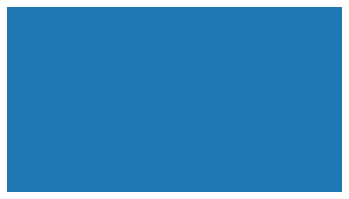

In [13]:
scheme = mc.EqualInterval(street['count'])
ax = grids[0].plot()
gplt.choropleth(street, ax=ax, hue='count', scheme=scheme, legend=True)

In [ ]:
write_list =[]
streets=[]
for i in range(len(grids)):
    stuff
    temp = (list(ins), list(outs))
    write_list.append(temp)
    plotting stuff
with open('test.txt', 'a') as outfile:
    json.dump(temp, outfile)

In [ ]:
grids[0].at[1593, 'count']

In [ ]:
grids[0][:118].plot()

In [ ]:
import mapclassify